In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import os
from PIL import Image
import keras as K
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.layers import Flatten, Dense, Dropout

print('Libraries imported succesfully')

Libraries imported succesfully


In [2]:
#assign datasets directories
DIRNAME_train = './datasets/training_set'
DIRNAME_test = './datasets/test_set'

In [3]:
#assign fixed input image height and width
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [4]:
#function to load images into lists
def load_datasets(DIRNAME):
    images = []
    for dirname, _, filenames in os.walk(DIRNAME):
        for filename in filenames: 
            images.append(os.path.join(dirname, filename))
    random.shuffle(images) 

    return images



In [5]:
#load train datasets
train_images = load_datasets(DIRNAME_train)

In [6]:
#convert image into array
train_datasets=[]       
for images in train_images:
    #make sure '.DS_Store' files are not in directory
    if 'dog' in images:
        label=0
    else:
        label=1    
    img = Image.open(images)
    img = img.resize((IMG_HEIGHT, IMG_WIDTH))
    img_array= np.asarray(img)
    train_datasets.append([label,img_array])
            
random.shuffle(train_datasets)
m=len(train_datasets)
print(m)

25000


In [7]:
#create a dataframe to analyze data
df=pd.DataFrame(train_datasets)
df.columns = ["label", "ImageArray"]
df.head(-10)


,label,ImageArray
0,0,"[[[62, 61, 69], [48, 42, 52], [65, 57, 68], [6..."
1,0,"[[[141, 150, 123], [164, 170, 144], [155, 153,..."
2,1,"[[[79, 67, 43], [79, 67, 43], [79, 68, 44], [7..."
3,0,"[[[219, 211, 199], [214, 211, 196], [214, 215,..."
4,0,"[[[53, 34, 21], [56, 37, 24], [62, 45, 30], [6..."
...,...,...
24985,0,"[[[144, 128, 126], [138, 128, 124], [133, 131,..."
24986,1,"[[[11, 16, 10], [25, 26, 22], [50, 46, 43], [5..."
24987,0,"[[[252, 246, 216], [248, 246, 216], [255, 250,..."
24988,0,"[[[88, 106, 136], [159, 161, 162], [155, 157, ..."


In [8]:
print(df.shape)

(25000, 2)


In [9]:
#check input image shape
for i in range(10):
    print("Input Shape : ")
    print(df.ImageArray[i].shape)
    print(" Output data")
    print(df.label[i])

Input Shape : 
(64, 64, 3)
 Output data
0
Input Shape : 
(64, 64, 3)
 Output data
0
Input Shape : 
(64, 64, 3)
 Output data
1
Input Shape : 
(64, 64, 3)
 Output data
0
Input Shape : 
(64, 64, 3)
 Output data
0
Input Shape : 
(64, 64, 3)
 Output data
0
Input Shape : 
(64, 64, 3)
 Output data
0
Input Shape : 
(64, 64, 3)
 Output data
0
Input Shape : 
(64, 64, 3)
 Output data
1
Input Shape : 
(64, 64, 3)
 Output data
1


In [10]:
#create a vectorized input and output
input = list()
output = list()

for data in train_datasets:
    input.append(data[1])
    output.append([data[0]])  
    
input = np.array(input)
output = np.array(output)

print("Input Shape : {}".format(input.shape))
print("Output Shape : {}".format(output.shape))
 

Input Shape : (25000, 64, 64, 3)
Output Shape : (25000, 1)


In [17]:
#create a CNN model 
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
def model():
    model = K.Sequential()
    
    model.add(Conv2D(32 , kernel_size=(3, 3),  input_shape = input_shape, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size  = (2,2)))
    
    model.add(Conv2D(64 , kernel_size=(3, 3),  input_shape = input_shape, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size  = (2,2)))
    
    model.add(Conv2D(128 , kernel_size=(3, 3),  input_shape = input_shape, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size  = (2,2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
  
    return model
    
    

In [18]:
model = model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 64)       

In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
model.fit(input, output, batch_size=32, epochs=4, validation_split=0.1)

Epoch 1/4
704/704 [==============================] - 88s 124ms/step - loss: 1.0019 - accuracy: 0.5787 - val_loss: 0.6375 - val_accuracy: 0.6468
Epoch 2/4
704/704 [==============================] - 86s 123ms/step - loss: 0.6020 - accuracy: 0.6820 - val_loss: 0.5915 - val_accuracy: 0.7064
Epoch 3/4
704/704 [==============================] - 86s 123ms/step - loss: 0.5729 - accuracy: 0.7100 - val_loss: 0.5252 - val_accuracy: 0.7728
Epoch 4/4
704/704 [==============================] - 86s 122ms/step - loss: 0.5376 - accuracy: 0.7354 - val_loss: 0.4969 - val_accuracy: 0.7740


In [21]:
#load test images
test_images = load_datasets(DIRNAME_test)


In [22]:
#resize test image
img = Image.open(test_images[0])
img = img.resize((IMG_HEIGHT, IMG_WIDTH))


The target image is : 


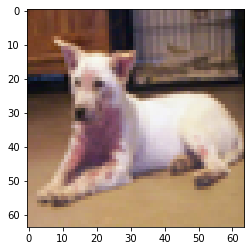

In [23]:
#visualize target image
print("The target image is : ")
plt.imshow(img)

In [24]:
input_arr= np.asarray(img).reshape(-1,IMG_HEIGHT,IMG_WIDTH,3)

In [25]:
print(input_arr.shape)

(1, 64, 64, 3)


In [28]:
#create prediction model
def pred():
    pred = model.predict(input_arr)
    if (pred[0][0] <= 0.5):
        return "dog"
    else:
        return"cat"

In [29]:
#prediction
pred_pet=pred()
print("The animal in the image is : {} ".format(pred_pet))

The animal in the image is : dog 
